In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../DataSets/Train.csv")

In [3]:
X = df.values

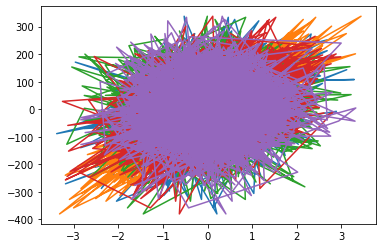

In [4]:
plt.plot(X[:,:5], X[:,5])

In [5]:
x = X[:,:5]

In [6]:
print(x)

[[ 0.29341624 -0.94559871 -0.42110515  0.40681602  0.52566183]
 [-0.83608408 -0.18922804 -0.77640262 -1.05383124  0.59799685]
 [ 0.23642511  0.13283602 -0.14772298  0.69985396 -0.18736416]
 ...
 [ 1.04417694 -0.89920649  1.73039905 -1.87105676  0.44251965]
 [-1.2691729  -0.00505216  1.85766873 -1.08036482  0.73633394]
 [-1.88400025 -0.84942743 -1.45227035  0.48861308  1.4595758 ]]


In [7]:
y = X[:,5]

In [8]:
print(y)

[ -82.15466656  -48.89796018   77.2703707  ... -107.51050797  -47.34155781
 -115.93900296]


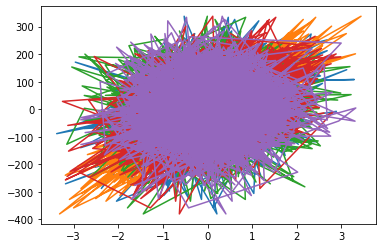

In [9]:
X = (x-x.mean())/(x.std())
Y = y
plt.plot(x,y)
plt.show()

In [42]:
def hypothesis(x, theta):
    add=theta[0]
    #print(theta.shape)
    for j in range (x.shape[0]):
        add += theta[j+1]*x[j]
    return add
def error(X,Y,theta):
    m = X.shape[0]
    error = 0
    for i in range(m):
        hx = hypothesis(X[i], theta)
        error += (hx - Y[i])**2
    return error
def gradient(X,Y,theta):
    grad = np.zeros((X.shape[1],))
    m = X.shape[0]
    for i in range(m):
        hx=   hypothesis(X[i,:], theta)     
        for j in range(X.shape[1]):
            grad[j] += (hx - Y[j]) * X[i,j]
    return grad
        
def gradientDescent(X, Y , learningRate=0.000000000001):
    theta = np.zeros((X.shape[1]+1,))
    itr = 0
    error_list=[]
    
    while(itr<=500):
        grad = gradient(X,Y,theta)
        e=error(X,Y,theta)
        for j in range(X.shape[1]):
             theta[j]=theta[j] - learningRate*grad[j]
        error_list.append(e)
        itr+=1
    return theta,error_list
    
final_theta, error_list = gradientDescent(X,Y)

In [43]:
X.shape

(1600, 5)

In [44]:
final_theta

array([-1.55788343e-06,  3.09288251e-07, -1.52714819e-06,  5.41776288e-08,
       -9.49472704e-07,  0.00000000e+00])

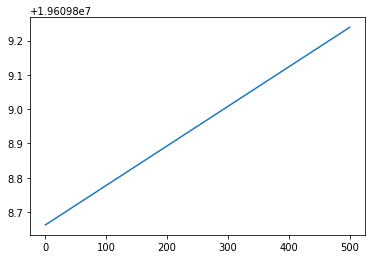

In [45]:
plt.plot(error_list)

In [46]:
dftest = pd.read_csv("../DataSets/Test.csv")
x_test=dftest.values
m = x_test.shape[0]
x_test.shape
hx=np.zeros(x_test.shape[0])
for i in range(m):
    hxt=hypothesis(x_test[i,:], final_theta) 
    hx[i] = hxt
hx.shape
hx

array([-2.13308289e-06, -3.76438699e-06, -1.60023724e-06, -2.55103199e-06,
        1.90058566e-07, -5.82125804e-08, -1.23027054e-06, -2.97568974e-06,
       -4.75375599e-06, -3.55411317e-06, -3.52718656e-07, -1.49972004e-06,
       -1.54623802e-06, -2.78368145e-06, -6.65592068e-07, -2.55493329e-06,
        3.35044978e-06, -7.13028910e-07, -3.03149729e-06, -2.09978026e-06,
       -2.63015285e-06, -3.08535221e-07, -3.68450844e-07, -8.59954332e-07,
       -1.29980268e-06, -1.80413821e-06, -4.99921534e-07, -3.12637339e-06,
       -1.11697696e-06, -1.50714706e-06, -2.65533848e-06, -5.24725503e-07,
       -4.78458264e-06,  6.18203228e-08,  2.07645706e-06, -3.59740803e-06,
        5.00323539e-07, -2.20602028e-06,  2.39457975e-06, -2.07942905e-06,
        3.13783038e-07,  1.15164145e-06,  2.32439040e-06, -3.86235306e-06,
       -8.16979467e-07, -1.09608259e-06, -1.04014844e-06, -7.31526202e-07,
        4.54937041e-07, -7.32062651e-07, -2.38851505e-06,  2.28338325e-06,
       -1.65169483e-06,  

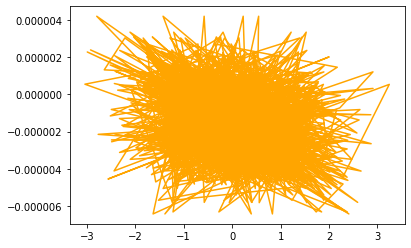

In [47]:
plt.plot(x_test[:,:5], hx, color='orange', label='prediction')


In [48]:
import csv
output = ["Id" ,"Target", y, hx]
with open("airquality.csv", 'w', newline='') as myfile:
    #wr = csv.writer(myfile, delimiter = NONE)
    #(print(out) for out in output_list)
    myfile.write("Id , Target\n")
    wr = csv.writer(myfile, delimiter =",")
    for i in range(1, hx.shape[0]+1):
        wr.writerow((i, hx[i-1]))
        #wr.writerow(hx[i])

        
     

In [111]:
X =  np.array(pd.read_csv("..\DataSets\Train.csv"))[:,:5]
Y =  np.array(pd.read_csv("..\DataSets\Train.csv"))[:,5]
Y=Y.reshape((Y.shape[0],1))
ones = np.ones((X.shape[0],1))
Y.shape


(1600, 1)

In [83]:
X_=np.hstack((X,ones))
X_.shape

(1600, 6)

In [84]:
def predict(X,theta):
    return np.dot(X,theta)
def getclosedform(X,Y):
    Y = np.mat(Y)
    first = np.dot(X.T, X)
    second = np.dot(X.T,Y)
    theta = np.linalg.pinv(first) * second
    return theta


In [100]:
theta = getclosedform(X_,Y)
theta
Y.shape

(1600, 1)

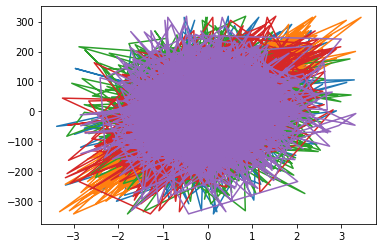

In [103]:
plt.plot(X, predict(X_, theta), label="prediction")
plt.show()

In [104]:
dftest = pd.read_csv("../DataSets/Test.csv")
x_test=np.array(dftest.values)

In [106]:
ones = np.ones((x_test.shape[0],1))
test=np.hstack((x_test,ones))
test.shape

(400, 6)

In [107]:
pred = []
for i in range (test.shape[0]):
    pred.append(np.dot(test[i], theta))
pred =np.array(pred)

In [110]:
pred

array([[[ 1.14583689e+02]],

       [[ 1.18012815e+02]],

       [[-2.17398523e+01]],

       [[-4.39368985e+01]],

       [[-9.59148984e+01]],

       [[-4.45074240e+01]],

       [[-7.55665260e+01]],

       [[ 2.38208355e+01]],

       [[ 1.73835284e+02]],

       [[ 1.72849290e+02]],

       [[-1.05402312e+02]],

       [[-2.08020234e+01]],

       [[-3.91323777e+00]],

       [[ 1.22999186e+02]],

       [[ 4.03078842e+01]],

       [[ 4.57128495e+01]],

       [[-1.89628491e+02]],

       [[ 2.26125454e+01]],

       [[ 1.16410473e+01]],

       [[ 1.36342143e+02]],

       [[ 6.49162552e+01]],

       [[-6.19884884e+01]],

       [[-1.08194679e+02]],

       [[-7.41212747e+00]],

       [[-5.85239528e+01]],

       [[ 1.18889777e+01]],

       [[ 2.92376400e+01]],

       [[ 1.07687579e+02]],

       [[ 2.41468563e+01]],

       [[-2.61050120e+01]],

       [[ 1.10968076e+02]],

       [[-4.48797096e+01]],

       [[ 2.16799939e+02]],

       [[-1.38606052e+01]],

       [[-2.28